In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
df=pd.read_csv(r'C:\Users\ASUS\Downloads\titanic-passengers.csv',sep=";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
df['Familysize']=df['SibSp']+df['Parch'] # creting Familysize by adding SibSp and Parch
del df['SibSp']
del df['Parch']
data_1=df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1) # drop useless colums like passengerId, Name....
data_1

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,No,2,male,28.0,13.0000,S,0
1,No,3,male,25.0,7.6500,S,0
2,No,3,male,20.0,7.8542,S,0
3,No,3,female,29.0,21.0750,S,4
4,No,1,male,31.0,52.0000,S,1
...,...,...,...,...,...,...,...
886,Yes,2,female,14.0,30.0708,C,1
887,No,3,male,22.0,7.2292,C,0
888,No,3,female,30.0,8.6625,S,0
889,No,3,male,NaN,7.8958,S,0


In [3]:
data_1["Age"].fillna(data_1["Age"].mean(),inplace=True) #Adjusting NAN values in Age 
data_1

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,No,2,male,28.000000,13.0000,S,0
1,No,3,male,25.000000,7.6500,S,0
2,No,3,male,20.000000,7.8542,S,0
3,No,3,female,29.000000,21.0750,S,4
4,No,1,male,31.000000,52.0000,S,1
...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,30.0708,C,1
887,No,3,male,22.000000,7.2292,C,0
888,No,3,female,30.000000,8.6625,S,0
889,No,3,male,29.699118,7.8958,S,0


In [4]:
data_1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      2
Familysize    0
dtype: int64

In [5]:
print(data_1["Embarked"].value_counts()) # Replacing NAN values in Embarked with the most frequent 

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:
data_1["Embarked"].fillna("S",inplace=True) # Replacing NAN values in Embarked with the most frequent
data_1

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,No,2,male,28.000000,13.0000,S,0
1,No,3,male,25.000000,7.6500,S,0
2,No,3,male,20.000000,7.8542,S,0
3,No,3,female,29.000000,21.0750,S,4
4,No,1,male,31.000000,52.0000,S,1
...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,30.0708,C,1
887,No,3,male,22.000000,7.2292,C,0
888,No,3,female,30.000000,8.6625,S,0
889,No,3,male,29.699118,7.8958,S,0


In [7]:
data_1["Survived"]=data_1["Survived"].map({'Yes':1,'No':0}) # Replacing boolean with binary
data_1["Sex"]=data_1["Sex"].map({'male':1,'female':0})
data_1["Embarked"]=data_1["Embarked"].map({'S':1,'C':0})
data_1

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,0,2,1,28.000000,13.0000,1.0,0
1,0,3,1,25.000000,7.6500,1.0,0
2,0,3,1,20.000000,7.8542,1.0,0
3,0,3,0,29.000000,21.0750,1.0,4
4,0,1,1,31.000000,52.0000,1.0,1
...,...,...,...,...,...,...,...
886,1,2,0,14.000000,30.0708,0.0,1
887,0,3,1,22.000000,7.2292,0.0,0
888,0,3,0,30.000000,8.6625,1.0,0
889,0,3,1,29.699118,7.8958,1.0,0


In [8]:
from sklearn.model_selection import train_test_split # Logistic model 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x=data_1[["Pclass", "Sex","Fare","Age","Familysize"]] # Embarked is the problem ( NAN")
y=data_1["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.80


In [13]:

Confusion_matrix=pd.crosstab(y_test,y_pred,rownames=["Survived"],colnames=["Age"]) #Confusion matrix
print(Confusion_matrix)

Age         0   1
Survived         
0         164  25
1          37  86


AUC: 0.90


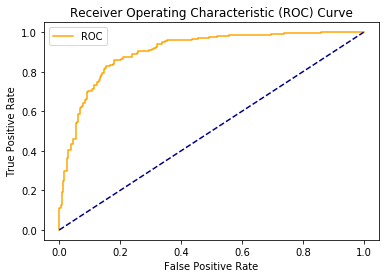

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    
    data_1, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

    
    trainX, testX, trainy, testy = train_test_split(data_1, class_label, test_size=0.3, random_state=1)
    
    
    model = RandomForestClassifier()
model.fit(trainX, trainy)

probs = model.predict_proba(testX)


probs = probs[:, 1]


auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(testy, probs)

plot_roc_curve(fpr, tpr)

In [ ]:
# In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test